In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def irls(A, y, init = None, normalize = False, app1 = False, app2 = False, maxiter = 1, d = 0.0000001, tol = 0.00001):
    
    N, D = A.shape
    
    assert N == y.shape[0], "Number of samples don't match"
    
    print "Dimensions are : ", N, "x", D
    
    if(init is None):
        w = np.ones((N, 1))
    else:
        w = init
    
    for i in range(maxiter):
        
        # Our formula is beta = inv(X'WX)X'Wy
        
        # Create diagonal matrix W
        W = np.diagflat(w)
        # Compute X'WX
        if(app1):
            term1 = A.transpose()
        else:
            term1 = np.matmul(A.transpose(), W)
            
        term2 = np.matmul(term1, A)
    
    # Compute inverse
        term3 = np.linalg.inv(term2)
    
    # Compute X'Wy
        if(app2):
            term4 = A.transpose()
        else:
            term4 = np.matmul(A.transpose(), W)
        
        term5 = np.matmul(term4, y)
    
    # Compute total
        beta = np.matmul(term3, term5)
    
    # Clip really small values, below d
        nw = np.maximum(d, np.abs(y - np.matmul(A, beta)))
        # Invert the weights
        nw = np.power(nw, - 1)
        if(normalize):
            w = nw / nw.sum()
        else:
            w = nw
        
        print "Iteration number : ", i+1
        
    
    return w, beta

In [106]:
N = 1000
d = 50
alpha = int (0.2*N)
c = 3
mu = 0
sigma = 1
idx = np.arange(N)
np.random.shuffle(idx)
iters = 10

In [107]:
A = np.random.normal(mu, sigma, (N, d)) * np.sqrt(1.0/N)
xstar = np.random.normal(mu, 5*sigma, (d, 1))
B = np.random.normal(mu, c*sigma, (alpha, 1))
y = np.matmul(A, xstar)
y[idx[0:alpha]] = y[idx[0:alpha]] + B
w = np.ones((N, 1))
i = 1

In [112]:
w1 = np.ones((N, 1))
# plt.scatter(i, w1[idx[0:alpha]].sum()/w1.sum())
w2 = np.ones((N, 1))
# plt.scatter(i, w2[idx[0:alpha]].sum()/w2.sum())
for i in range(30):
    w1, beta1 = irls(A, y, w1, False,  False, False)
    w2, beta2 = irls(A, y, w2, False,   False, False)
    plt.scatter(i, np.linalg.norm(beta1 - xstar), color="b")
    plt.scatter(i, np.linalg.norm(beta2 - xstar), color="r")
#     plt.scatter(i, w1[idx[0:alpha]].sum()/w1.sum(), color="r")
#     plt.scatter(i, w2[idx[0:alpha]].sum()/w2.sum(), color="b")

Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1
Dimensions are :  1000 x 50
Iteration number :  1


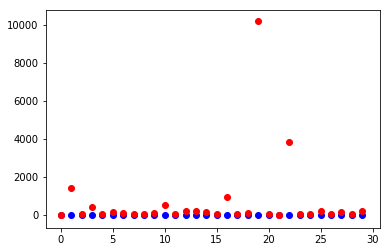

In [113]:
plt.show()

In [91]:
sorted(np.linalg.eig(np.matmul(A.transpose(), A))[0])

[0.6274150009188252,
 0.6417090723864853,
 0.6703819068789626,
 0.6876710443916008,
 0.718352468948399,
 0.724470819218985,
 0.746699589808739,
 0.7622899612761572,
 0.779456557932473,
 0.7893172979231419,
 0.7956393428423504,
 0.8106606926370393,
 0.8173534496243461,
 0.8277201128716207,
 0.838197315311586,
 0.8577748510089344,
 0.8785430462385111,
 0.886359484119139,
 0.8885603318230433,
 0.9100405563698697,
 0.9254353435052374,
 0.9336156623526268,
 0.945011060478088,
 0.9688004634165602,
 0.9830025303761596,
 0.985947152223325,
 0.9960715360231346,
 1.0083601778778695,
 1.0296170227646533,
 1.0538726797391713,
 1.0692969591124188,
 1.0806264677201127,
 1.0894667402297118,
 1.1048459253935021,
 1.1380983501939803,
 1.155086488481171,
 1.165665502891919,
 1.1854181899289096,
 1.197420297308921,
 1.2081237369365703,
 1.2370991905618451,
 1.2474174699107352,
 1.2656468887813268,
 1.301144206273209,
 1.3078769986151273,
 1.3268820804525814,
 1.3488952852756746,
 1.380554130227195,
 1.43